In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline

In [91]:
# Replace with the path to the logs directory in multi-memory-task
#logs_path = '/Users/isabella/multi-memory-task/logs'
logs_path = 'C:\\Users\\isami\\Dropbox\\multi-memory' 

# Replace this with the name of the dataset directories
vLTM_datasets = ["2023_07_21_13_34_06",
"2023_07_21_14_55_35",
"2023_07_21_15_11_12",
"2023_07_21_11_12_44",
"2023_07_21_11_44_25",
"2023_07_21_13_13_03",
"2023_07_25_16_46_31",
"2023_07_26_08_45_28",
"2023_07_26_09_28_32",
"2023_07_26_08_59_34",
"2023_07_26_09_07_21",
"2023_07_25_09_06_21",
"2023_07_25_09_15_18",
"2023_07_25_09_32_48",
"2023_07_25_09_44_59",
"2023_07_25_16_23_43",
"2023_07_26_12_36_06",
"2023_07_26_12_48_42",
"2023_07_26_12_30_31"]

vLTM_trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=vLTM_datasets)
vLTM_df = get_trial_dataframe.get_trial_dataframe(trial_paths=vLTM_trial_paths)

vSTM_datasets =  ["2023_07_18_11_31_09",
"2023_07_18_11_58_28","2023_07_18_13_44_54",
"2023_07_18_13_46_05",
"2023_07_18_14_06_59",
"2023_07_18_17_16_22",
"2023_07_19_10_01_36",
"2023_07_19_10_22_23",
"2023_07_18_11_08_50",
"2023_07_25_09_06_21",
"2023_07_25_09_15_18",
"2023_07_25_09_32_48",
"2023_07_25_09_44_59"]

vSTM_trial_paths = get_trial_paths.get_trial_paths(logs_path=logs_path, datasets=vSTM_datasets)
vSTM_df = get_trial_dataframe.get_trial_dataframe(trial_paths=vSTM_trial_paths)

Number of trials:  2799
Number of trials:  1512


In [92]:
vLTM_df = vLTM_df[vLTM_df['fixed'] == True]
vLTM_df = vLTM_df[vLTM_df['visible'] == 0]

vSTM_df = vSTM_df[vSTM_df['fixed'] == True]

In [93]:
precision_difference_arr = []

for (row_index,row_data) in vSTM_df.iterrows():
    precision_difference_arr.append(analysis_pipeline.find_angular_dist(row_data['object_0_theta'],row_data['response_theta']))

vSTM_df['precision_difference_0'] = precision_difference_arr
vSTM_df['precision_difference_0_abs'] = vSTM_df['precision_difference_0'].abs()

ylabel = 'Angular Distance from Target (rad)'

analysis_pipeline.round('delay_s',vSTM_df)
vSTM_df['delay_bins'] = pd.qcut(vSTM_df['rounded_delay_s'],4,labels=np.arange(4),duplicates='drop')

In [94]:
precision_difference_arr = []

for (row_index,row_data) in vLTM_df.iterrows():
    precision_difference_arr.append(analysis_pipeline.find_angular_dist(row_data['object_0_theta'],row_data['response_theta']))

vLTM_df['precision_difference_0'] = precision_difference_arr
vLTM_df['precision_difference_0_abs'] = vLTM_df['precision_difference_0'].abs()

ylabel = 'Angular Distance from Target (rad)'

analysis_pipeline.round('long_delay_s',vLTM_df)
vLTM_df['delay_bins'] = pd.qcut(vLTM_df['rounded_long_delay_s'],4,labels=np.arange(4),duplicates='drop')

Text(0.5, 1.0, 'Delay Time Effect on Memory')

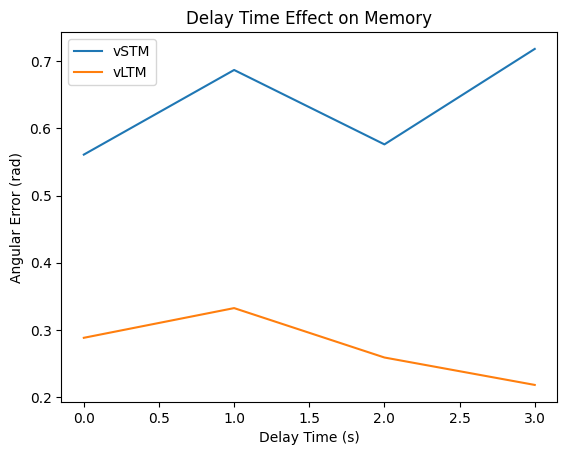

In [95]:
fig,ax = plt.subplots()
ax.plot(vSTM_df.groupby('delay_bins').precision_difference_0_abs.mean(),label='vSTM')
ax.plot(vLTM_df.groupby('delay_bins').precision_difference_0_abs.mean(),label='vLTM')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Error (rad)')
plt.title('Delay Time Effect on Memory')

Text(0.5, 1.0, 'Delay Time Effect on Memory')

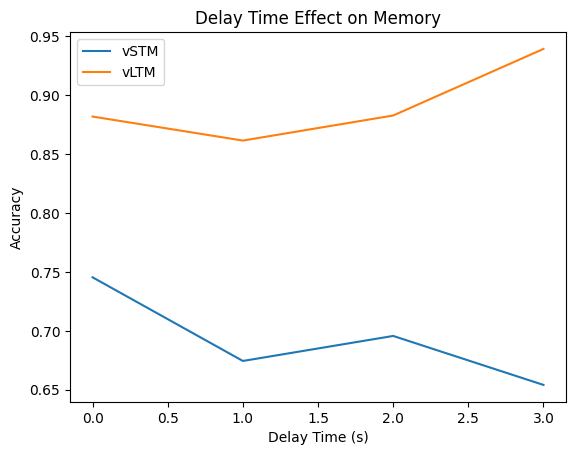

In [96]:
fig,ax = plt.subplots()
ax.plot(vSTM_df.groupby('delay_bins').correct.mean(),label='vSTM')
ax.plot(vLTM_df.groupby('delay_bins').correct.mean(),label='vLTM')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Accuracy')
plt.title('Delay Time Effect on Memory')

Text(0.5, 1.0, 'Encoding Time Effect on Memory')

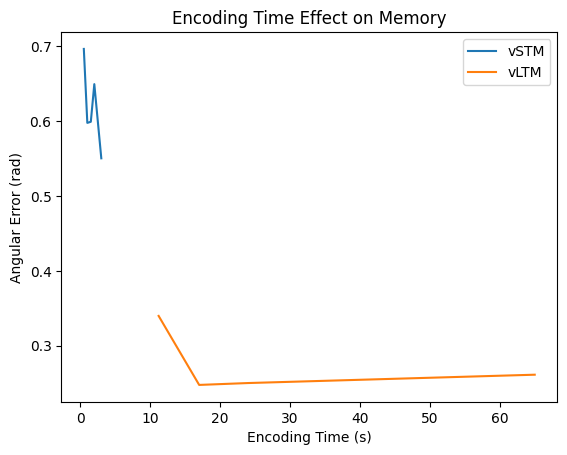

In [97]:
analysis_pipeline.round('long_visible_s',vLTM_df)
_,bins = pd.qcut(vLTM_df['rounded_long_visible_s'],4,duplicates='drop', retbins=True)
vLTM_df['visible_bins'] = pd.qcut(vLTM_df['rounded_long_visible_s'], q=4, labels=np.round(bins[1:], 1))

analysis_pipeline.round('visible_s',vSTM_df)
_,bins = pd.qcut(vSTM_df['rounded_visible_s'],4,duplicates='drop', retbins=True)
vSTM_df['visible_bins'] = pd.qcut(vSTM_df['rounded_visible_s'], q=4, labels=np.round(bins[1:], 1))

fig,ax = plt.subplots()
ax.plot(vSTM_df.groupby('rounded_visible_s').precision_difference_0_abs.mean(),label='vSTM')
ax.plot(vLTM_df.groupby('visible_bins').precision_difference_0_abs.mean(),label='vLTM')
plt.legend()
plt.xlabel('Encoding Time (s)')
plt.ylabel('Angular Error (rad)')
plt.title('Encoding Time Effect on Memory')

In [98]:
# fig,ax = plt.subplots()
# ax.plot(vSTM_df.groupby('visible_bins').correct.mean(),label='vSTM')
# ax.plot(vLTM_df.groupby('visible_bins').correct.mean(),label='vLTM')
# plt.legend()
# plt.xlabel('Encoding Time (s)')
# plt.ylabel('Accuracy')
# plt.title('Encoding Time Effect on Memory')

Text(0.5, 1.0, 'Set Size Effect on Memory')

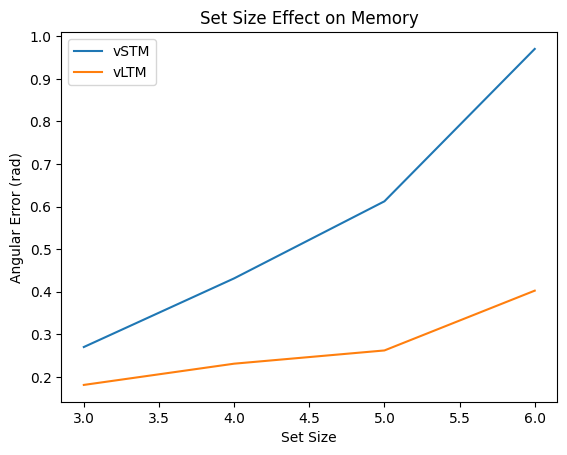

In [99]:
fig,ax = plt.subplots()
ax.plot(vSTM_df.groupby('num_object').precision_difference_0_abs.mean(),label='vSTM')
ax.plot(vLTM_df.groupby('num_object').precision_difference_0_abs.mean(),label='vLTM')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Error (rad)')
plt.title('Set Size Effect on Memory')

Text(0.5, 1.0, 'Set Size Effect on Memory')

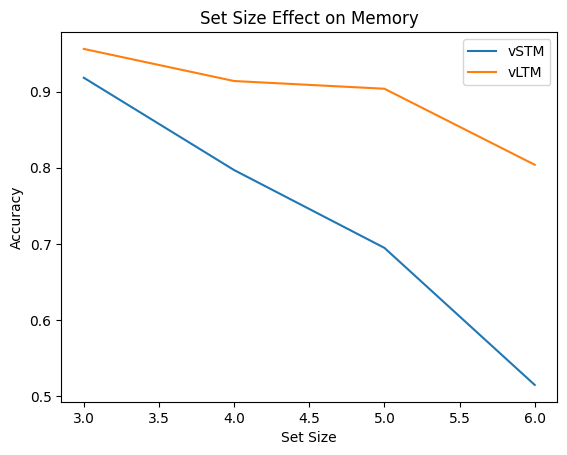

In [100]:
fig,ax = plt.subplots()
ax.plot(vSTM_df.groupby('num_object').correct.mean(),label='vSTM')
ax.plot(vLTM_df.groupby('num_object').correct.mean(),label='vLTM')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on Memory')

Text(0.5, 1.0, 'Difference in Angular Error from Target (Incorrect Trials)')

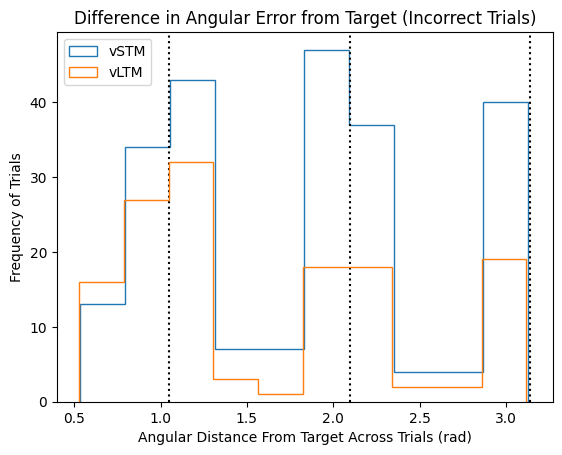

In [108]:
vSTM_incorrect_df = vSTM_df[vSTM_df['correct'] == 0]
vLTM_incorrect_df = vLTM_df[vLTM_df['correct'] == 0]

fig,ax = plt.subplots()
ax.hist(vSTM_incorrect_df.precision_difference_0_abs, histtype = 'step', label='vSTM')
ax.axvline(x=(np.pi / 3), linestyle = 'dotted', color='black')
ax.axvline(x=(np.pi / 3)*2, linestyle = 'dotted', color='black')
ax.axvline(x=(np.pi / 3 )*3, linestyle = 'dotted', color='black')
ax.hist(vLTM_incorrect_df.precision_difference_0_abs, histtype = 'step', label='vLTM')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (Incorrect Trials)')

Text(0.5, 1.0, 'Difference in Angular Error from Target (Correct Trials)')

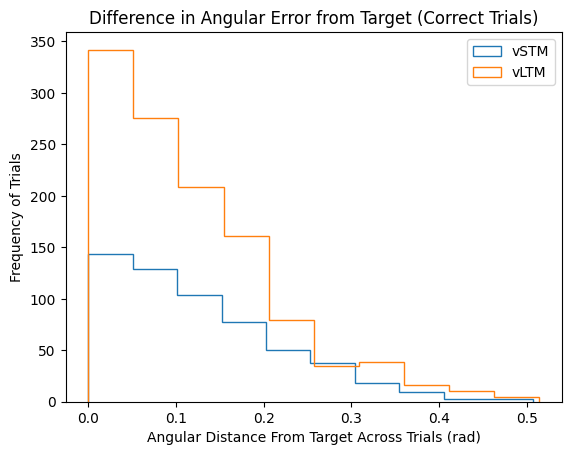

In [102]:
vSTM_correct_df = vSTM_df[vSTM_df['correct'] == 1]
vLTM_correct_df = vLTM_df[vLTM_df['correct'] == 1]

fig,ax = plt.subplots()
ax.hist(vSTM_correct_df.precision_difference_0_abs, histtype = 'step', label='vSTM')
ax.hist(vLTM_correct_df.precision_difference_0_abs, histtype = 'step', label='vLTM')
plt.legend()
plt.xlabel('Angular Distance From Target Across Trials (rad)')
plt.ylabel('Frequency of Trials')
plt.title('Difference in Angular Error from Target (Correct Trials)')

Text(0.5, 1.0, 'Distribution of reaction times (All Trials)')

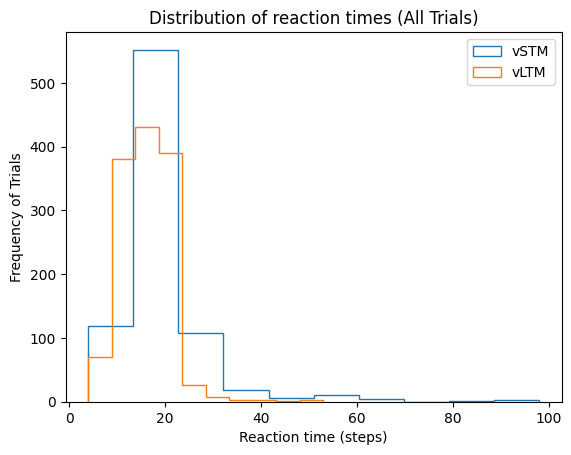

In [113]:
fig,ax = plt.subplots()
ax.hist(vSTM_df.reaction_time_steps, histtype = 'step', label='vSTM')
ax.hist(vLTM_df.reaction_time_steps, histtype = 'step', label='vLTM')
plt.legend()
plt.xlabel('Reaction time (steps)')
plt.ylabel('Frequency of Trials')
plt.title('Distribution of reaction times (All Trials)')

Text(0.5, 1.0, 'Reaction times (All Trials)')

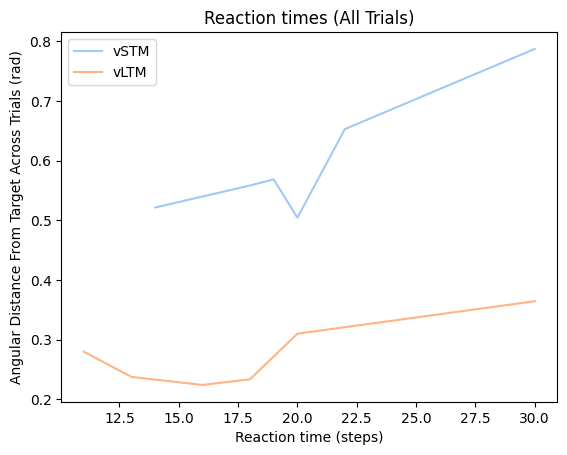

In [170]:
vSTM_df = vSTM_df[vSTM_df['reaction_time_steps'] <= 30]
vLTM_df = vLTM_df[vLTM_df['reaction_time_steps'] <= 30]

fig,ax = plt.subplots()

_,bins = pd.qcut(vSTM_df['reaction_time_steps'],6,duplicates='drop', retbins=True)
vSTM_df['rxn_bins'] = pd.qcut(vSTM_df['reaction_time_steps'], q=6, labels=np.round(bins[1:], 1))

_,bins = pd.qcut(vLTM_df['reaction_time_steps'],6,duplicates='drop', retbins=True)
vLTM_df['rxn_bins'] = pd.qcut(vLTM_df['reaction_time_steps'], q=6, labels=np.round(bins[1:], 1))

ax.plot(vSTM_df.groupby('rxn_bins').precision_difference_0_abs.mean(), label='vSTM')
ax.plot(vLTM_df.groupby('rxn_bins').precision_difference_0_abs.mean(), label='vLTM')
plt.legend()
plt.xlabel('Reaction time (steps)')
plt.ylabel('Angular Distance From Target Across Trials (rad)')
plt.title('Reaction times (All Trials)')

Text(0.5, 1.0, 'Reaction times (All Trials)')

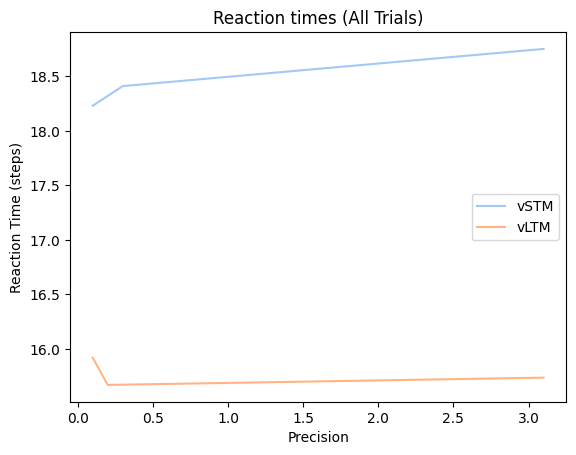

In [177]:
vSTM_df = vSTM_df[vSTM_df['reaction_time_steps'] <= 30]
vLTM_df = vLTM_df[vLTM_df['reaction_time_steps'] <= 30]

fig,ax = plt.subplots()

_,bins = pd.qcut(vSTM_df['precision_difference_0_abs'],3,duplicates='drop', retbins=True)
vSTM_df['precision_bins'] = pd.qcut(vSTM_df['precision_difference_0_abs'], q=3, labels=np.round(bins[1:], 1))

_,bins = pd.qcut(vLTM_df['precision_difference_0_abs'],3,duplicates='drop', retbins=True)
vLTM_df['precision_bins'] = pd.qcut(vLTM_df['precision_difference_0_abs'], q=3, labels=np.round(bins[1:], 1))

ax.plot(vSTM_df.groupby('precision_bins').reaction_time_steps.mean(), label='vSTM')
ax.plot(vLTM_df.groupby('precision_bins').reaction_time_steps.mean(), label='vLTM')
plt.legend()
plt.xlabel('Precision')
plt.ylabel('Reaction Time (steps)')
plt.title('Reaction times (All Trials)')

In [154]:
from scipy.stats import gaussian_kde
from scipy.integrate import simps

[Text(0.5, 0, 'Memory Strength')]

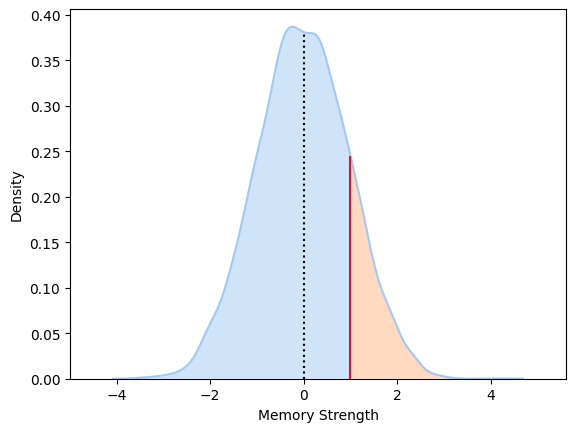

In [167]:
sns.set_palette('pastel')
x = np.random.normal(size=6000)
kde = gaussian_kde(x)
ax = sns.kdeplot(x)
kdeline = ax.lines[0]
xmin,xmax = ax.get_xlim()
x = np.linspace(xmin,xmax,1000)
thresh = 1
kde_y = kde(x)
x0 = x[x<thresh]
x0_len = len(x0)
y0 = kde_y[:x0_len]
x1 = x[x0_len:]
y1 = kde_y[x0_len:]
area0 = np.round(simps(y0, x0, dx=1) * 100, 0)
area1 = np.round(simps(y1, x1, dx=1) * 100, 0)
ax.fill_between(x=x0, y1=y0,alpha=.5)
ax.fill_between(x=x1, y1=y1,alpha=.5)
mean = x.mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height1 = np.interp(0,xs,ys)
height2 = np.interp(thresh,xs,ys)
ax.vlines(0,0,height1,color='black', ls=':', label='mean')
ax.vlines(1,0,height2,color='crimson', label='threshold')
ax.set(xlabel='Memory Strength')